In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

np.set_printoptions(suppress=True)
import warnings
warnings.filterwarnings('ignore')

In [4]:
data = pd.read_csv('tsne_scores.csv')

In [5]:
data

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376
...,...,...
4401,-15.211057,-69.717155
4402,-9.403443,-62.847458
4403,-17.546083,-10.295582
4404,-8.512799,16.375420


In [8]:
print('Variable:',data.shape[1])
print('Observations:',data.shape[0])

Variable: 2
Observations: 4406


## KMeans Clustering

In [21]:
n_clus= list(range(2,12))

In [14]:
wcss = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(data)
    wcss.append(model.inertia_)

In [15]:
wcss

[13082972.794451013,
 7535767.963360588,
 4751131.766337408,
 3305298.828734787,
 2447934.397773105,
 1912841.6834018417,
 1535721.2194558769,
 1286120.699371986,
 1047608.6518513635,
 865361.3197262834,
 732873.0019196639]

In [16]:
k_elbow = KElbowVisualizer(KMeans(),k=12)

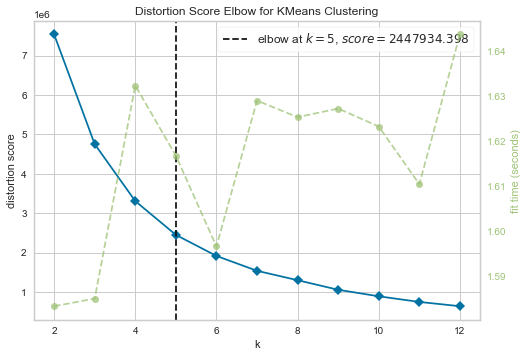

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [18]:
k_elbow.fit(data)
k_elbow.show()

In [22]:
sil_score = []
for i in n_clus:
    model = KMeans(n_clusters=i)
    model.fit(data)
    pred = model.predict(data)
    sil_score.append(silhouette_score(data,pred))

In [23]:
sil_score

[0.3919378663716124,
 0.42114609415352633,
 0.44651523908279983,
 0.46267228491152046,
 0.47302248137901765,
 0.4941826985787323,
 0.5270443030633077,
 0.5318715470324035,
 0.5218030569229706,
 0.5354675841781366]

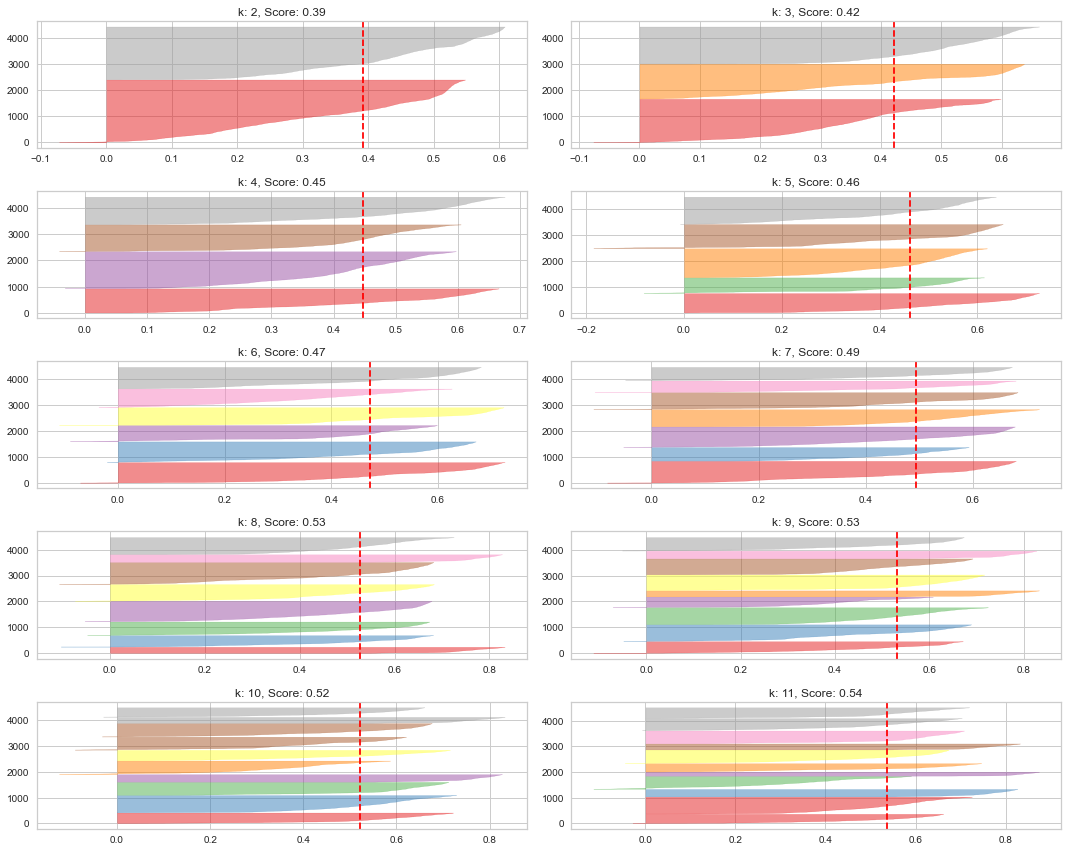

In [25]:
t=1
plt.figure(figsize=(15,12))
for i in nclus:
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data)
    plt.title('k: %s, Score: %.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [34]:
final_model = KMeans(n_clusters=9)

In [35]:
final_model.fit(data)

KMeans(n_clusters=9)

In [36]:
y_pred_kmeans = final_model.predict(data)

In [37]:
centroids = final_model.cluster_centers_

C:\Users\IT\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


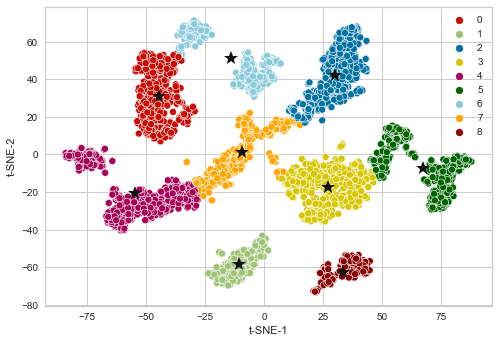

In [40]:
sns.scatterplot(data['t-SNE-1'],data['t-SNE-2'],hue=y_pred_kmeans,
               palette=['r','g','b','y','m','darkgreen','c','orange','darkred'])
for i in range(9):    
    plt.plot(centroids[i][0],centroids[i][1],marker='*',ms=14,color='k')
plt.show()

### Aggloromative Clustering

In [42]:
# Lets create a linkage matrix
link_mat = linkage(data,method='single')

In [46]:
link_mat[-10:]

array([[3219.        , 8796.        ,    5.57200901, 1525.        ],
       [6931.        , 8800.        ,    6.05438597,  889.        ],
       [8782.        , 8802.        ,    6.8650299 , 1190.        ],
       [8801.        , 8803.        ,    8.23224812, 2715.        ],
       [8779.        , 8804.        ,    8.82949881, 2961.        ],
       [8798.        , 8805.        ,    9.36361168, 3114.        ],
       [4497.        , 8806.        ,   10.33508685, 3116.        ],
       [8793.        , 8807.        ,   15.34459761, 3885.        ],
       [8799.        , 8808.        ,   19.47727605, 4174.        ],
       [8768.        , 8809.        ,   19.5152454 , 4406.        ]])

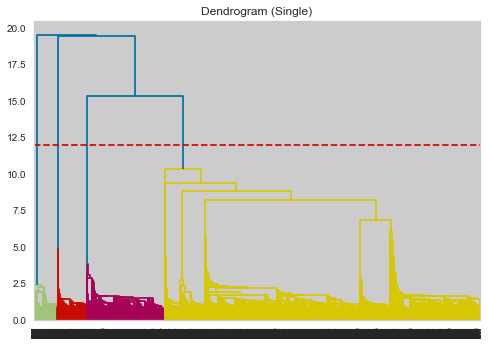

In [48]:
plt.title('Dendrogram (Single)')
dendrogram(link_mat)
plt.axhline(y=12,ls='--',color='r')
plt.show()

In [53]:
n_clus = list(range(2,15))

In [56]:
sil_score = []
for i in n_clus:
    model = AgglomerativeClustering(n_clusters=i,linkage='single')
    pred = model.fit_predict(data)
    sil_score.append(silhouette_score(data,pred))

In [57]:
sil_score

[0.19610351310236945,
 0.16288973431244957,
 0.15555027928766532,
 0.01139496210821687,
 0.0751261460023476,
 0.02925106538099285,
 0.1549507036922858,
 0.17627719241243822,
 0.0953850696043456,
 0.06758965472470471,
 0.046776583444046546,
 0.007730260934163031,
 -0.013365938776357314]

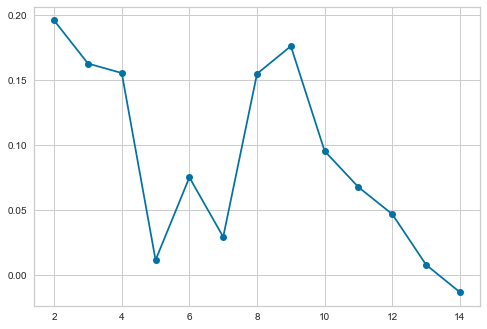

In [58]:
plt.plot(n_clus,sil_score,marker='o')

In [76]:
dist_mat = euclidean_distances(data)
dist_mat.shape

(4406, 4406)

In [75]:
dist_mat = euclidean_distances(data)
act_dist = dist_mat[np.triu_indices(4406,k=1)]

coeff,cophenet_dist = cophenet(link_mat,act_dist)
coeff

0.4430555044198261

In [66]:
agglo_model = AgglomerativeClustering(n_clusters=9,linkage='single')

In [67]:
y_pred_agglo = agglo_model.fit_predict(data)

<AxesSubplot:xlabel='t-SNE-1', ylabel='t-SNE-2'>

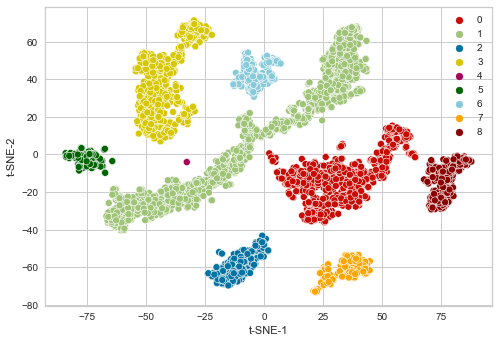

In [68]:
sns.scatterplot(data['t-SNE-1'],data['t-SNE-2'],hue=y_pred_agglo,
               palette=['r','g','b','y','m','darkgreen','c','orange','darkred'])

### DBSCAN

In [77]:
act_dist.min()

0.0054062992869863755

In [78]:
act_dist.max()

171.97392307718363

In [79]:
epsilon = range(5,16)
minsamp = range(4,12)

In [80]:
for e in epsilon:
    for m in minsamp:
        model = DBSCAN(eps=e,min_samples=m)
        pred = model.fit_predict(data)
        print('Epsilon: %.2f  Min Sample: %d  Silhouttte Score: %.3f'\
             %(e,m,silhouette_score(data,pred)))

Epsilon: 5.00  Min Sample: 4  Silhouttte Score: 0.114
Epsilon: 5.00  Min Sample: 5  Silhouttte Score: 0.114
Epsilon: 5.00  Min Sample: 6  Silhouttte Score: 0.114
Epsilon: 5.00  Min Sample: 7  Silhouttte Score: 0.114
Epsilon: 5.00  Min Sample: 8  Silhouttte Score: 0.111
Epsilon: 5.00  Min Sample: 9  Silhouttte Score: 0.164
Epsilon: 5.00  Min Sample: 10  Silhouttte Score: 0.164
Epsilon: 5.00  Min Sample: 11  Silhouttte Score: 0.164
Epsilon: 6.00  Min Sample: 4  Silhouttte Score: 0.095
Epsilon: 6.00  Min Sample: 5  Silhouttte Score: 0.095
Epsilon: 6.00  Min Sample: 6  Silhouttte Score: 0.095
Epsilon: 6.00  Min Sample: 7  Silhouttte Score: 0.095
Epsilon: 6.00  Min Sample: 8  Silhouttte Score: 0.095
Epsilon: 6.00  Min Sample: 9  Silhouttte Score: 0.219
Epsilon: 6.00  Min Sample: 10  Silhouttte Score: 0.219
Epsilon: 6.00  Min Sample: 11  Silhouttte Score: 0.219
Epsilon: 7.00  Min Sample: 4  Silhouttte Score: 0.155
Epsilon: 7.00  Min Sample: 5  Silhouttte Score: 0.155
Epsilon: 7.00  Min Sampl

In [81]:
final_model = DBSCAN(eps=6,min_samples=9)

In [83]:
pred_dbscan = final_model.fit_predict(data)

<AxesSubplot:xlabel='t-SNE-1', ylabel='t-SNE-2'>

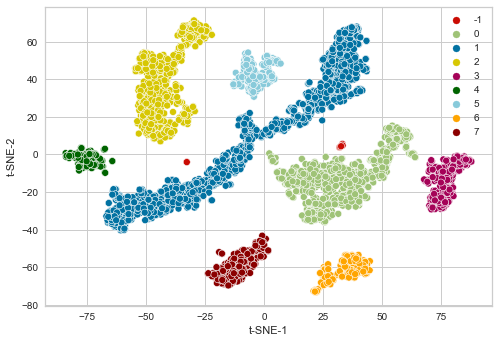

In [84]:
sns.scatterplot(data['t-SNE-1'],data['t-SNE-2'],hue=pred_dbscan,
               palette=['r','g','b','y','m','darkgreen','c','orange','darkred'])